## Logistic Regression

So far, we’ve been predicting quantitative values.
* Price per unit area ($$$)
* Number of Interactions (Integers)
* Salary of data analysts ($$$)

But what do we use if we need to predict a qualitative value?
* Fraudulent vs Non-Fraudulent Emails
* Malignant Tumor vs. Non-Malignant Tumor
* Image of a dog vs …

This is called classification (whereas predicting a continuous value is called regression). 

NOTE: This statistical learning method is called logistic "regression", however this is an only because the underlying technique is similair to regression, whereas the outcome still focuses on classification. A better label might have been "logistic classification."

Today, we will be working on the a breast cancer dataset in order to predict which tumors are benign or malignant: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

First, we do some light EDA:

In [1]:
import pandas as pd
import numpy as np

cancer = pd.read_csv("../data/bcancer.csv")

# simple data transform
cancer["diagnosis"] = np.where(cancer["diagnosis"] == "M", 1, 0)
cancer.drop(columns=["Unnamed: 32"], inplace=True)

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# observe columns 
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

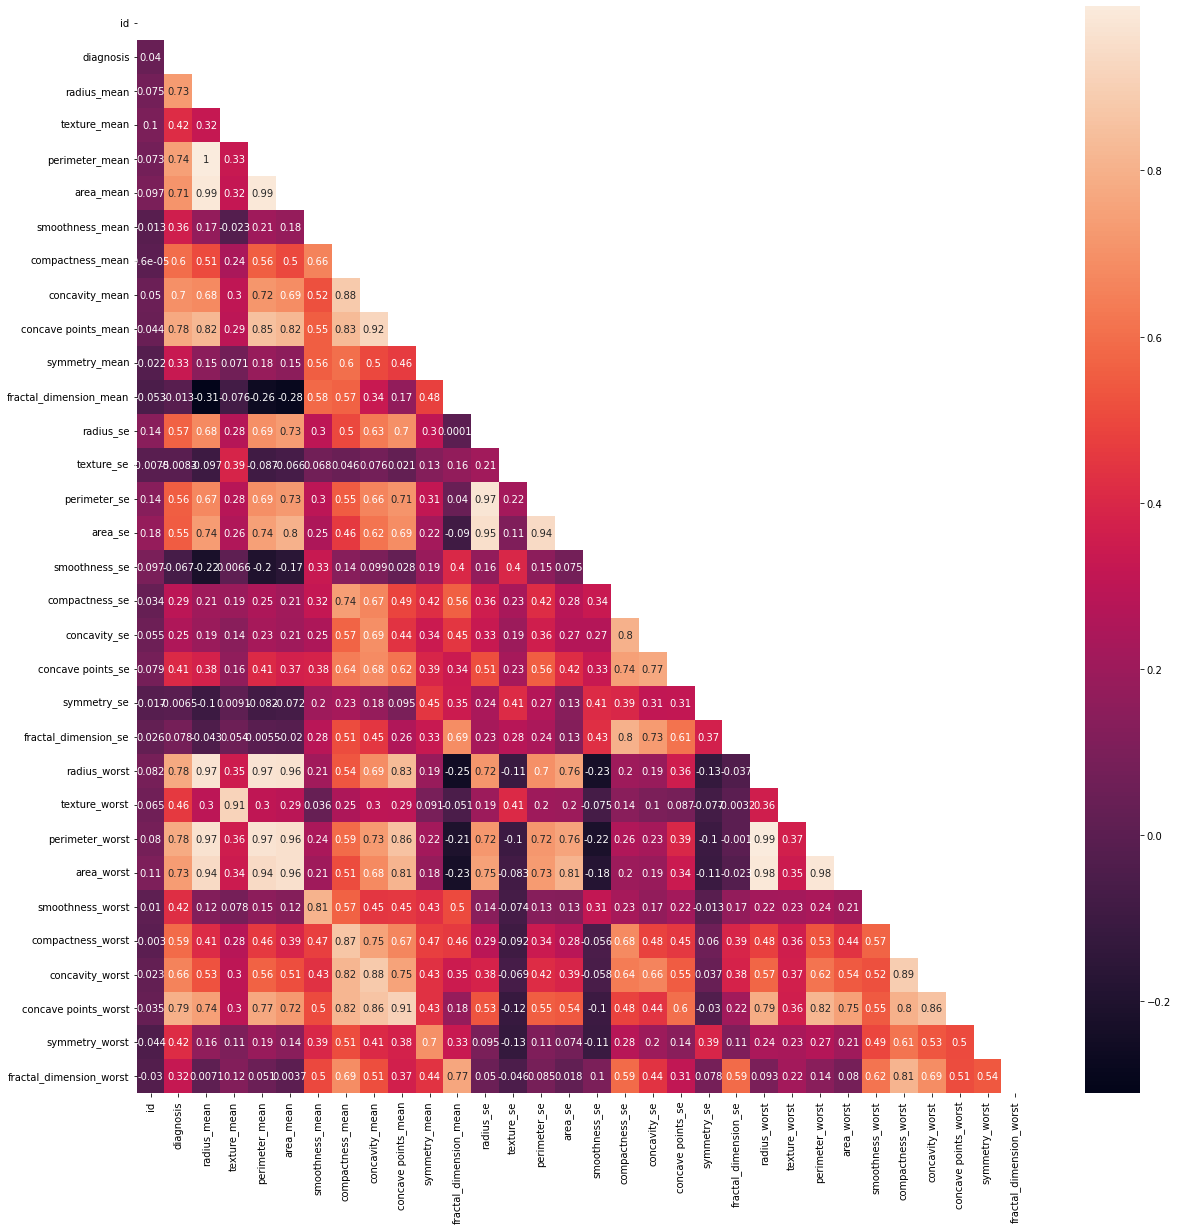

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# more info on generating this heatmap: https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/
mask = np.triu(np.ones_like(cancer.corr())) 

plt.figure(figsize=(20,20))
sns.heatmap(cancer.corr(), annot=True, mask=mask)
plt.show()

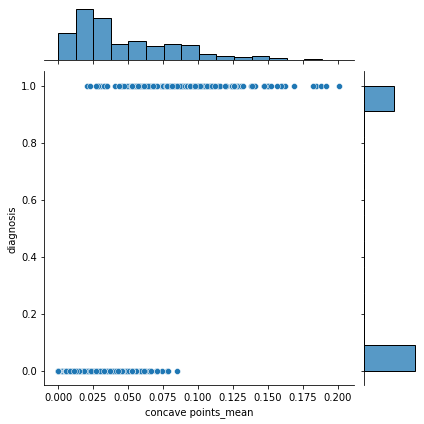

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data=cancer, x="concave points_mean", y="diagnosis")
plt.show()

For the above graph, how would you draw a line of best fit? We could potentially create a linear regression model:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = cancer[["concave points_mean"]]
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.score(X_test, y_test))

0.591932293155724


Let's visualize what kind of model this creates...

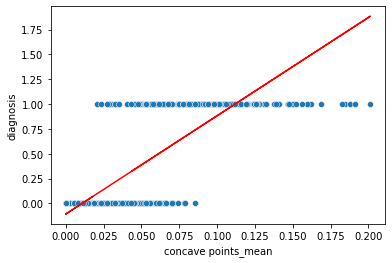

In [7]:
predictions = lm.predict(X_train)

sns.scatterplot(data = cancer, x = 'concave points_mean', y = 'diagnosis')
plt.plot(X_train, predictions, c='r')
plt.show()

If our task is to predict probabilities, we've unfortunately created some ridiculous values. What does it mean for someone to have a 175% chance of having cancer? In addition, let's see what vulnerabilities this model has to outliers:

0.5985712723353578


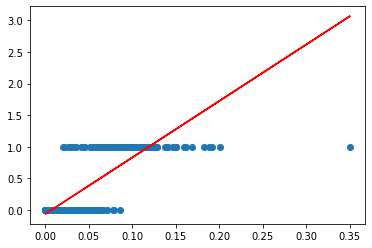

In [8]:
X = cancer[["concave points_mean"]].to_numpy()
y = cancer["diagnosis"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

# artificially introduce outlier data point with extreme concave points_mean to X_train
X_train = np.append(X_train, 0.350).reshape(-1, 1)
y_train = np.append(y_train, 1)

lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.score(X_test, y_test))

predictions = lm.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, predictions, c='r')
plt.show()

As you can observe, an outlier will "pull" the model to some optimal set of coefficients that does not sufficiently model relationship.

This is what we call a high leverage point: "those with extremely unusual independent variable values in either direction from the mean (large or small). Such points are noteworthy because they have the potential to exert considerable “pull”, or leverage, on the model's best-fit line."

All high leverage points are outliers! But not all outliers are high leverage points.

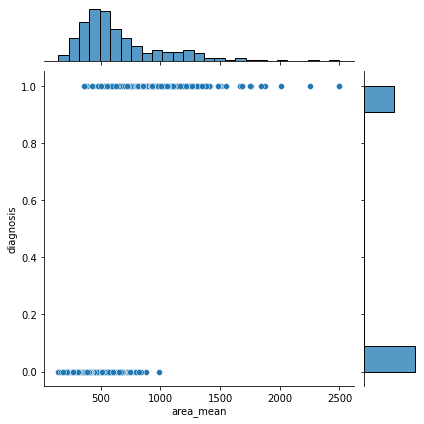

In [9]:
sns.jointplot(data=cancer, x="area_mean", y="diagnosis")
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = cancer[["area_mean"]]
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

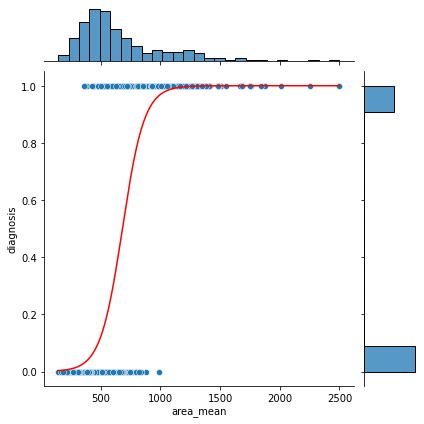

In [14]:
probs = clf.predict_proba(X)
pos_probs = [second for _, second in probs]

sns.jointplot(data=cancer, x="area_mean", y="diagnosis")
sns.lineplot(x=cancer["area_mean"], y=pos_probs, c="red")
plt.show()

In [15]:
# this creates an array showing the probability of each class of outcome (index 0 = class 0; index 1 = class 1)
clf.predict_proba(X_test)

array([[8.98019325e-01, 1.01980675e-01],
       [7.61052760e-03, 9.92389472e-01],
       [3.25775817e-01, 6.74224183e-01],
       [9.11226245e-01, 8.87737554e-02],
       [9.54098878e-01, 4.59011218e-02],
       [1.76423640e-03, 9.98235764e-01],
       [1.66984144e-04, 9.99833016e-01],
       [4.88409911e-02, 9.51159009e-01],
       [8.53359135e-01, 1.46640865e-01],
       [7.10533347e-01, 2.89466653e-01],
       [8.27296853e-01, 1.72703147e-01],
       [9.78686529e-02, 9.02131347e-01],
       [4.77719626e-01, 5.22280374e-01],
       [1.71609408e-01, 8.28390592e-01],
       [9.10608700e-01, 8.93912997e-02],
       [7.44805314e-03, 9.92551947e-01],
       [5.03525247e-01, 4.96474753e-01],
       [9.82463569e-01, 1.75364307e-02],
       [9.97140982e-01, 2.85901845e-03],
       [1.10615613e-03, 9.98893844e-01],
       [7.43514054e-01, 2.56485946e-01],
       [9.28477250e-01, 7.15227501e-02],
       [3.77311426e-04, 9.99622689e-01],
       [9.83268985e-01, 1.67310146e-02],
       [9.467890

In [16]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [17]:
from sklearn.metrics import confusion_matrix

# generate confusion matrix
confusion_matrix(y_test, predictions)

array([[69,  2],
       [ 7, 36]], dtype=int64)

In [18]:
# calculate the rate of correct responses (predict = 1; actual = 1)(predict = 0; actual = 0)
clf.score(X_test, y_test)

0.9210526315789473

## Multivariate Logistic Regression

Just like with our regression model, we can include more predictors in our model to get more accurate results!

Let's add the "concave points_mean" feature to our model to explore multi-dimensional models.

In [19]:
X = cancer[["area_mean", "concave points_mean"]]
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

clfm = LogisticRegression(random_state=0)
clfm.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
# generate confusion matrix
predictions = clfm.predict(X_test)
confusion_matrix(y_test, predictions)

array([[69,  2],
       [ 7, 36]], dtype=int64)

In [21]:
# calculate the rate of correct responses (predict = 1; actual = 1)(predict = 0; actual = 0)
clfm.score(X_test, y_test)

# do you notice any difference in accuracy?
# what does this mean about our two variables?
# what issues could be impacting our predictors?

0.9210526315789473

<AxesSubplot:xlabel='area_mean', ylabel='concave points_mean'>

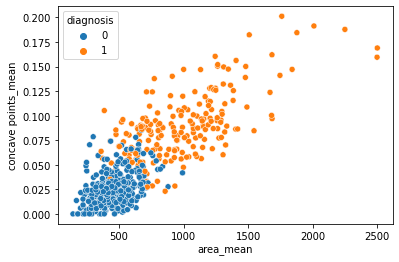

In [22]:
# visualize two-dimensional dataset
sns.scatterplot(data=cancer, x="area_mean", y="concave points_mean", hue="diagnosis")

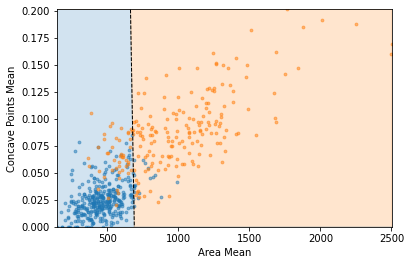

In [23]:
# plot decision boundary (https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression)
b = clfm.intercept_[0]
w1, w2 = clfm.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = np.min(cancer["area_mean"]), np.max(cancer["area_mean"])
ymin, ymax = np.min(cancer["concave points_mean"]), np.max(cancer["concave points_mean"])

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(cancer["area_mean"][cancer["diagnosis"] == 0], cancer["concave points_mean"][cancer["diagnosis"] == 0], c='tab:blue', s=8, alpha=0.5)
plt.scatter(cancer["area_mean"][cancer["diagnosis"] == 1], cancer["concave points_mean"][cancer["diagnosis"] == 1], c='tab:orange',s=8, alpha=0.5)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel("Concave Points Mean")
plt.xlabel("Area Mean")

plt.show()


Accuracy: 0.9210526315789473


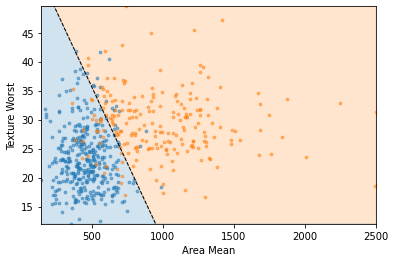

In [24]:
# play with variables
X = cancer[["area_mean", "texture_worst"]]
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

# playing with hyper-params
clfm1 = LogisticRegression(max_iter=100, random_state=42)
clfm1.fit(X_train, y_train)

# plot decision boundary (https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression)
b = clfm1.intercept_[0]
w1, w2 = clfm1.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = np.min(cancer["area_mean"]), np.max(cancer["area_mean"])
ymin, ymax = np.min(cancer["texture_worst"]), np.max(cancer["texture_worst"])

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(cancer["area_mean"][cancer["diagnosis"] == 0], cancer["texture_worst"][cancer["diagnosis"] == 0], c='tab:blue', s=8, alpha=0.5)
plt.scatter(cancer["area_mean"][cancer["diagnosis"] == 1], cancer["texture_worst"][cancer["diagnosis"] == 1], c='tab:orange',s=8, alpha=0.5)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel("Texture Worst")
plt.xlabel("Area Mean")

print("Accuracy:", clfm1.score(X_test, y_test))

plt.show()


Seems like we're hitting a wall of accuracy, let's add more variables...

In [25]:
X = cancer[["area_mean", "texture_worst", "symmetry_mean"]]
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)

clfm2 = LogisticRegression(max_iter=100, random_state=42)
clfm2.fit(X_train, y_train)
print(clfm2.score(X_test, y_test))

0.9298245614035088


However, we have to be careful with adding too many variables, as visualized in the test accuracy plotted below

In [26]:
X_pred_cols = ["area_mean"]

X = cancer[X_pred_cols]
y = cancer["diagnosis"]

X_new_cols = cancer.columns.tolist()
X_new_cols.remove("diagnosis")
X_new_cols.remove("id")
var_count = [i for i in range(1, len(X_new_cols))]

X_new_cols.remove("area_mean")

test_acc = []
train_acc = []
while len(X_new_cols) > 0:
    # INCREASE MAX_iters to prevent "failed to converge" error
    log = LogisticRegression(max_iter=10_000, random_state=42)

    X_pred_cols.append(X_new_cols.pop(0))
    X = cancer[X_pred_cols]

    X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=42)
    log.fit(X_train, y_train)

    train_acc.append(log.score(X_train, y_train))
    test_acc.append(log.score(X_test, y_test))

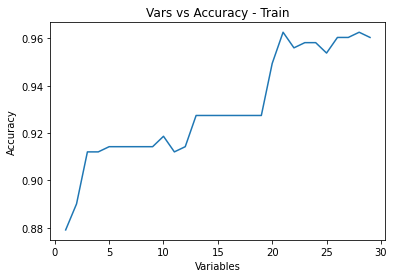

In [27]:
plt.plot(var_count, train_acc)
plt.title("Vars vs Accuracy - Train")
plt.xlabel("Variables")
plt.ylabel("Accuracy")
plt.show()

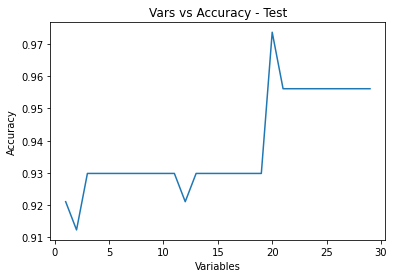

In [28]:
plt.plot(var_count, test_acc)
plt.title("Vars vs Accuracy - Test")
plt.xlabel("Variables")
plt.ylabel("Accuracy")
plt.show()

## Try it Yourself

Use the `Loan_data.csv` dataset to create a logistic regression model to predict whether someone will be eligible for a loan or not.

https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan

In [29]:
import pandas as pd
import numpy as np

loans = pd.read_csv("../data/Loan_data.csv")

loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# simple data transformations


# train-test-split


# predict


# score


# graph???

## Societal Question

What is the risk to this "loan-eligbility" model? 

## Metaphysical Question

Does knowing the physical properties of an object tell you what something is?

Thought experiment: In the future (2448 AD), humans have colonized Mars. Due to planetery conditions it is impossible to grow plant.s Mars instead relies on artificially introduced algae in man-made lakes for oxygen production. 

A scientists on Mars dedicates her life to studying plants, albeit the lack of plants on this planet.

However, this didn't hinder her. She understands the full breadth of plant knowledge. She understands chemical properties, physical cultivation, and has seen countless photos of plants. She is, in essence, the most knowledable authority figure on plants in Mars.

One day, she embarks on a trip to planet Earth and for the first time sees a field of grass. Did the experience of being close in proximity to plants add to her knowledge of plants?

If so, what essences did this physical trip add that "remote" exposure perhaps did not.

## Sprint 4 Deliverables

Sprint 4 Deliverables:
* Plan conceptual & logical database via ERD’s
* Develop initial setup schema (written in SQL)
* Plan primary & foreign keys 

Submission Materials:
* ERD’s (UML Diagram)
* Database schema (sql file) 
* Normalization (discussion)

We’re going to stagger this due  date, to 4/25 since we will only be reviewing ERD’s & SQL tomorrow. 

## Reference Material

**Videos**
* [Logistic Regression w/ Andrew Ng](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy)
**Reading Material**
* [ISLR Ch 4.1-4.3](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)